# Classification
In this project, we will use a dataset from Kaggle to predict the survival of patients with heart failure from serum creatinine and ejection fraction, and other factors such as age, anemia, diabetes, and so on.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer,Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
data = pd.read_csv('heart_failure.csv')
data.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,death_event
0,0,75.0,no,582,no,20,yes,265000.00,1.9,130,yes,no,4,1,yes
1,1,55.0,no,7861,no,38,no,263358.03,1.1,136,yes,no,6,1,yes
2,2,65.0,no,146,no,20,no,162000.00,1.3,129,yes,yes,7,1,yes
3,3,50.0,yes,111,no,20,no,210000.00,1.9,137,yes,no,7,1,yes
4,4,65.0,yes,160,yes,20,no,327000.00,2.7,116,no,no,8,1,yes


In [4]:
print(data.info())
print(Counter(data['death_event']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    object 
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    object 
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    object 
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    object 
 11  smoking                   299 non-null    object 
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
 14  death_even

# Data Preprocessing

In [5]:
#Feature selection
y = data.iloc[:,-1:]
x = data.iloc[:, 1:-2]
#Converting categorial data into one hot encoding
x = pd.get_dummies(x)
#Splitting th data
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25, random_state = 57)
# Standazing the numerical features
ct = ColumnTransformer([('numeric', StandardScaler(), ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
# Preparing label for classification
le = LabelEncoder()
Y_train = le.fit_transform(Y_train.astype(str))
Y_test = le.transform(Y_test.astype(str))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Building The Model

In [57]:
def design_model(features):
  model = Sequential()
  model.add(InputLayer(input_shape = (X_train.shape[1],)))
  model.add(Dense(12, activation = 'relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(6, activation = 'relu'))
  # model.add(Dropout(0.1))

  model.add(Dense(2, activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  model.summary()
  return model

In [62]:
es = EarlyStopping(monitor='val_loss',mode='min',patience=10)
model = design_model(X_train)
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 16, verbose = 1,validation_split=0.2,callbacks=[es])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 12)                96        
                                                                 
 dense_41 (Dense)            (None, 2)                 26        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 1s 38ms/step - loss: 0.7387 - accuracy: 0.5196 - val_loss: 0.6104 - val_accuracy: 0.6222
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6942 - accuracy: 0.5866 - val_loss: 0.5709 - val_accuracy: 0.6889
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6560 - accuracy: 0.6257 - val_loss: 0.5378 - val_accuracy: 0.6889
Epoch 4/100
12/12 [======

In [63]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)

print("Loss", loss, "Accuracy:", acc)


Loss 0.5209091901779175 Accuracy: 0.7599999904632568


# Visualizing Model

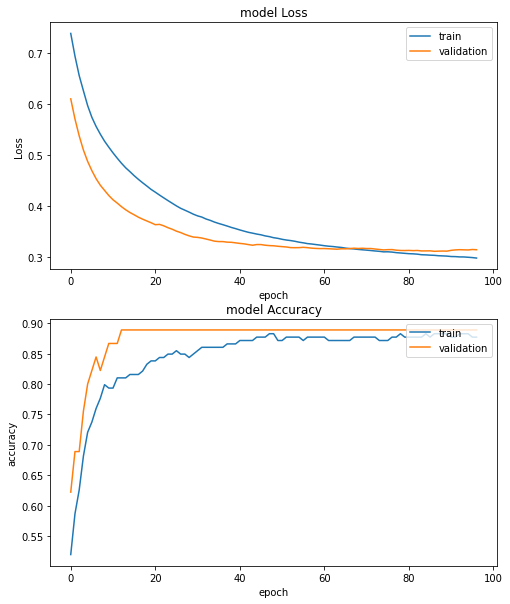

In [64]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper right')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('model Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper right')

plt.show()

# Generating a classification report

In [65]:
y_estimate = model.predict(X_test, verbose = 0)

y_estimate = np.argmax(y_estimate, axis=1)


y_true = np.argmax(Y_test, axis=1)

print(classification_report(y_true, y_estimate))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.67      0.50      0.57        24

    accuracy                           0.76        75
   macro avg       0.73      0.69      0.70        75
weighted avg       0.75      0.76      0.75        75

